In [7]:
# This code contains the kinematic calculations to move a hexapod milling or additive machine.
# equations from: https://www.janssenprecisionengineering.com/page/hexapod-kinematics/
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as LA
from math import cos, sin, radians

In [ ]:
### Machine Definition ###

# Angle between hinge locations of a leg-pair
alpha_p = radians(110)  # platform
alpha_b = radians(110)  # base

# Pitch circle radius
R_p = 40   # radius of the circle on which the platform hinges are located
R_b = 200  # radius of the circle on which the base hinges are located


In [ ]:
### Kinematic Calc Inputs ###
# location before the differential move (time = t_0)
M = np.array([0,0,0])
Z_p = M[2]

# Differential Move
dx, dy, dz =    20, 20, 0
dRx, dRy, dRz = radians(90), radians(90), radians(90) # Rotation isn't working

In [ ]:
def circle(r, z, h = 0, k = 0, num_points = 200):
    #https://stackoverflow.com/questions/56870675/how-to-do-a-3d-circle-in-matplotlib
    """
    Returns a list containing points to graph a circle
    """
    theta = np.linspace(0, 2*np.pi, num_points)
    x = r * np.cos(theta)+h
    y = r * np.sin(theta)+k
    z= np.full(num_points, z)

    return [x, y, z]

def P_nom(R, theta, Z):
    """
    Input:

    R: pitch circle radius
    theta: angle????
    Z: relative height with resp to machine origin

    Output: Nominal position of hinges (base or platform)
    """
    return np.array( [R*cos(theta), R*sin(theta), Z] )

def thetas(alpha): # in radians, out radians
    """
    Is this the angle between the platform/base and the leg?
    Input: angle between hinge locations. platform/Base
    Output: theta for all six legs?
    """
    return [ radians(270) - alpha/2, radians(270) + alpha/2, radians(30) - alpha/2, radians(30) + alpha/2, radians(150) - alpha/2, radians(150) + alpha/2 ]

def Q(dRx, dRy, dRz):
    # Rotation matrix
    # use local variables in the func?
    R_x = np.array( [ [ 1, 0, 0 ], [ 0, cos(dRx), -sin(dRx) ], [ 0, sin(dRx), cos(dRx) ] ] )
    R_y = np.array( [ [ cos(dRy), 0, sin(dRy) ], [ 0, 1, 0 ], [ -sin(dRy), 0, cos(dRy) ] ] )
    R_z = np.array( [ [ cos(dRz), -sin(dRz), 0 ], [ sin(dRz), cos(dRz), 0 ], [ 0, 0, 1 ] ] )
    return R_x@R_y@R_z

def dP(dx, dy, dz, dRx, dRy, dRz, M, P_nom):
    """

    """
    P_nom = np.array([[P_nom[0]], [P_nom[1]],[P_nom[2]]])
    M = np.array([[M[0]],[M[1]],[M[2]]])
    return np.array([[dx], [dy], [dz]]) + ( ( Q(dRx,dRy,dRz)@np.identity(3) ) @ (P_nom - M) )

def s(P_delta_p, P_nom_b, P_nom_p):
    """
    Calculates actuator lengths after a differential move
    """
    s = []
    for P_delta, P_b, P_p, in zip(P_delta_p, P_nom_b, P_nom_p):
        s.append( LA.norm(P_delta - P_b) - LA.norm(P_p - P_b) ) # Norm calculates the magnitude of the vectors which is the link length?
    return s

In [ ]:
def main():
    # Calculate arrays containing the theta values
    thetas_b = np.array( thetas(alpha_b) )
    thetas_p = np.array( thetas(alpha_p) )

    # Calculate nominal hinge location
    P_nom_p = np.array([P_nom(R_p, theta, Z_p) for theta in thetas_p])
    P_nom_b = np.array([P_nom(R_b, theta, 0) for theta in thetas_b])
    
    # Calculate position differential for the platform hinges
    dP_p = [dP(dx, dy, dz, dRx, dRy, dRz, M, P) for P in P_nom_p]

    # New platform hinge locs
    P_delta_p = P_nom_p + dP_p

    # Plot the platform
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Nominal Position
    for base, platform in zip(P_nom_b, P_nom_p):
        ax.plot([base[0],platform[0]], [base[1], platform[1]], [base[2], platform[2]])
    x, y, z = circle(h = M[0],k =  M[1], z = M[2], r = R_p) # Plot the platform
    ax.plot(x, y,z)

    # New Position
    for base, platform in zip(P_nom_b, P_delta_p):
        ax.plot([base[0],platform[0]], [base[1], platform[1]], [base[2], platform[2]])
    x, y, z = circle(h = M[0] + dx,k = M[1] + dy,z = M[2] + dz, r = R_p)
    ax.plot(x,y, z)
    x, y, z = circle(r = R_b, z = 0) # Plot the base
    ax.plot(x, y, z)

    plt.show()
    
if __name__ == "__main__":
    main()

In [ ]:
dRx = radians(90.0)
dRy = radians(90.0)
dRz = radians(0.0)
x, y, z = circle(r = 5, z = 0) # Plot the base
circleA =[]
for point_x,point_y,point_z in zip(x, y, z):
    circleA.append(np.array([[point_x],[point_y],[point_z]]))
circleA = np.round(np.array(circleA), 5)
# circleA = [x,y ,z] doesn't give correct result
print(circleA.shape)
# pointA = np.array([[1],[0],[0]]) # Column Vector
# pointA = np.array([1,0,0]) # Not a column vector, gives correct result? then dont need to bother with doing column vectors?
# pointA = np.array([1,0,0]).reshape(3,1) # Correct result
# print(pointA)

#Input is the angle that the X-axis is rotated by
R_x = np.array( [ [ 1,         0,           0         ], 
                  [ 0,         cos(dRx),    -sin(dRx) ], 
                  [ 0,         sin(dRx),    cos(dRx)  ] ] )

R_y = np.array( [ [ cos(dRy),  0,           sin(dRy) ],
                  [ 0,         1,           0        ],
                  [ -sin(dRy), 0,           cos(dRy) ] ] )

R_z = np.array( [ [ cos(dRz),  -sin(dRz),   0       ],
                  [ sin(dRz),  cos(dRz),    0       ],
                  [ 0,         0,           1       ] ] )

pointB=np.round(R_x@R_y@R_z@np.identity(3)@pointA, 4)

print(pointB)
circleB =[]
circleB =R_x@R_y@R_z@np.identity(3)@circleA
circleB = np.round(np.array(circleB), 4)
print(circleB)
x = []
y = []
z = []
for arr in circleB:
    x.append(float(arr[0]))
    y.append(float(arr[1]))
    z.append(float(arr[2]))

In [ ]:
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.set_xlim(left = -7, right = 7)
    ax1.set_zlim(bottom = -7, top = 7)
    ax1.set_ylim(bottom = -7, top = 7)
    ax1.set_ylabel("Y-axis")
    ax1.set_zlabel("Z-axis")
    ax1.set_xlabel("X-axis")
    
    ax1.plot(x, y,z)

In [ ]:
# Introduction to Robotics P27
B_P = np.array([0,10,20])
R = np.array([[1,0,0],[0,.5,.866],[0,-.866,.5]])
print(R@B_P) # Correct! (Matrix mult.)
print(R*B_P) # Incorrect! (element-wise mult?)

In [ ]:
# Platform coord to base coord Transform
import numpy as np
from numpy import linalg as LA
R=np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]]) # No rotation of the platform, Rotation matrix is an Identity matrix
B_P_Porg = np.array([[0],[0],[10]]) #Vector from Base origin to Platform origin
P_a=np.array([[4],[0],[0],[1]]) # This is the vector from the platform base origin to the hinge on the platform of interest
T = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,10],[0,0,0,1]]) # This is the hard code transform of the above data
# print(T@P_a) # Matrix multiplication
B_hinge_loc = np.array([[10],[0],[0]]) # This is a fixed location
test = T@P_a # define plat hinge in Base coordinate sys
test = np.delete(test, 3, 0)
actua = test-[[10], [0], [0]] # actuator pointing to platform
LA.norm(actua) # actuator length
print(T)

<IPython.core.display.Javascript object>


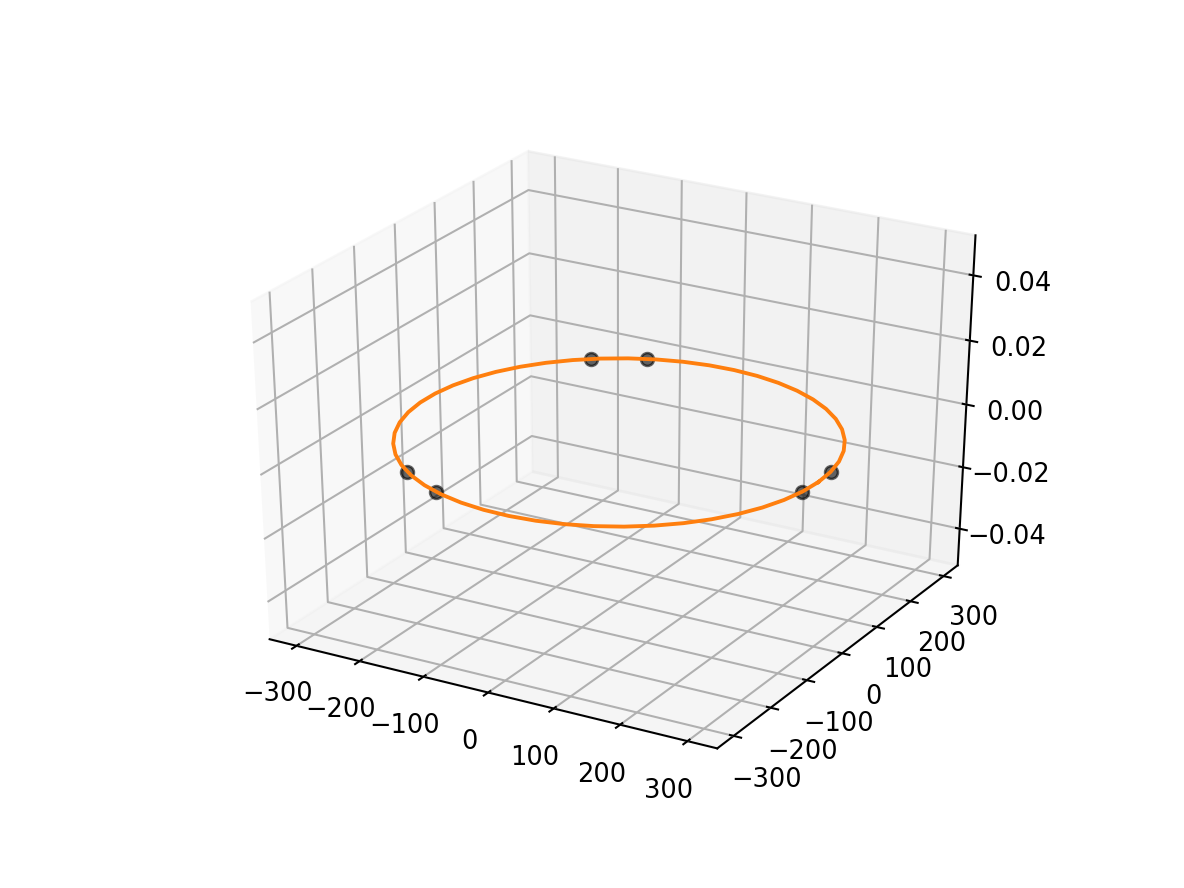

In [26]:
from math import radians, cos, sin
import math
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
# Defining Locations of the base hinges

# Machine Definition
r_base = 300 # mm
angle_offset = radians(15)

# Creating Hinge locations
b1 = np.array([r_base*cos(-angle_offset/2), r_base*sin(-angle_offset/2), 0])
b2 = np.array([r_base*cos(angle_offset/2), r_base*sin(angle_offset/2), 0])
b3 = np.array([r_base*cos(radians(120)-angle_offset/2), r_base*sin(radians(120)-angle_offset/2), 0])
b4 = np.array([r_base*cos(radians(120)+angle_offset/2), r_base*sin(radians(120)+angle_offset/2), 0])
b5 = np.array([r_base*cos(radians(240)-angle_offset/2), r_base*sin(radians(240)-angle_offset/2), 0])
b6 = np.array([r_base*cos(radians(240)+angle_offset/2), r_base*sin(radians(240)+angle_offset/2), 0])

bs = [b1, b2, b3, b4, b5, b6]

bx = list(map(lambda xs: xs[0], bs))
by = list(map(lambda ys: ys[1], bs))
bz = list(map(lambda zs: zs[2], bs))

ax1.plot(xs = bx,ys = by,zs = bz, 
         markerfacecolor='k', markeredgecolor='k', linestyle = 'None', marker='o', markersize=5, alpha=0.6)

xs=[]
ys=[]
zs=[]
for i in np.linspace(0, 2*math.pi):
    xs.append(cos(i)*r_base)
    ys.append(sin(i)*r_base)
    zs.append(0)
    
ax1.plot(xs, ys, zs)

In [ ]:
# Machine Parameters
r_base = 300 # mm
r_plat = 60 # mm
hinge_offset_angle = radians(15) # angle between hinges

def det_local_hinge_coords(r, hinge_offset_angle):
    # Creating Hinge locations from offset angles and offset angle from respective hinge
    # This essentially returns local coordinate system?
    hinge_angles = [0, radians(120), radians(240)] # The platform actuators divide the circle by 3 in pairs of 2.
    hinge_coords = []
    
    for angle in hinge_angles:
        base_hinge_coords.append(np.array([r*cos(angle-angle_offset/2), r*sin(angle-angle_offset/2), 0]))
        base_hinge_coords.append(np.array([r*cos(angle+angle_offset/2), r*sin(angle+angle_offset/2), 0]))
    return hinge_coords

def partial_circle(r, x, y, z): 
    # Will return hinge locations of the platform (no rotation) given the origin of the platform
    # This returns in base coord system though
    
    hinge_angles = [0, radians(120), radians(240)]
    hinge_coords = []
    for angle in hinge_angles:
        hinge_coords.append(np.array([r*cos(angle-angle_offset/2) + x, r*sin(angle-angle_offset/2) + y, z]))
        hinge_coords.appedn(np.array([r*cos(angle+angle_offset/2) + x, r*sin(angle+angle_offset/2) + y, z]))
    return hinge_coords

det_local_hinge_coords(r_base, hinge_offset_angle)


<IPython.core.display.Javascript object>


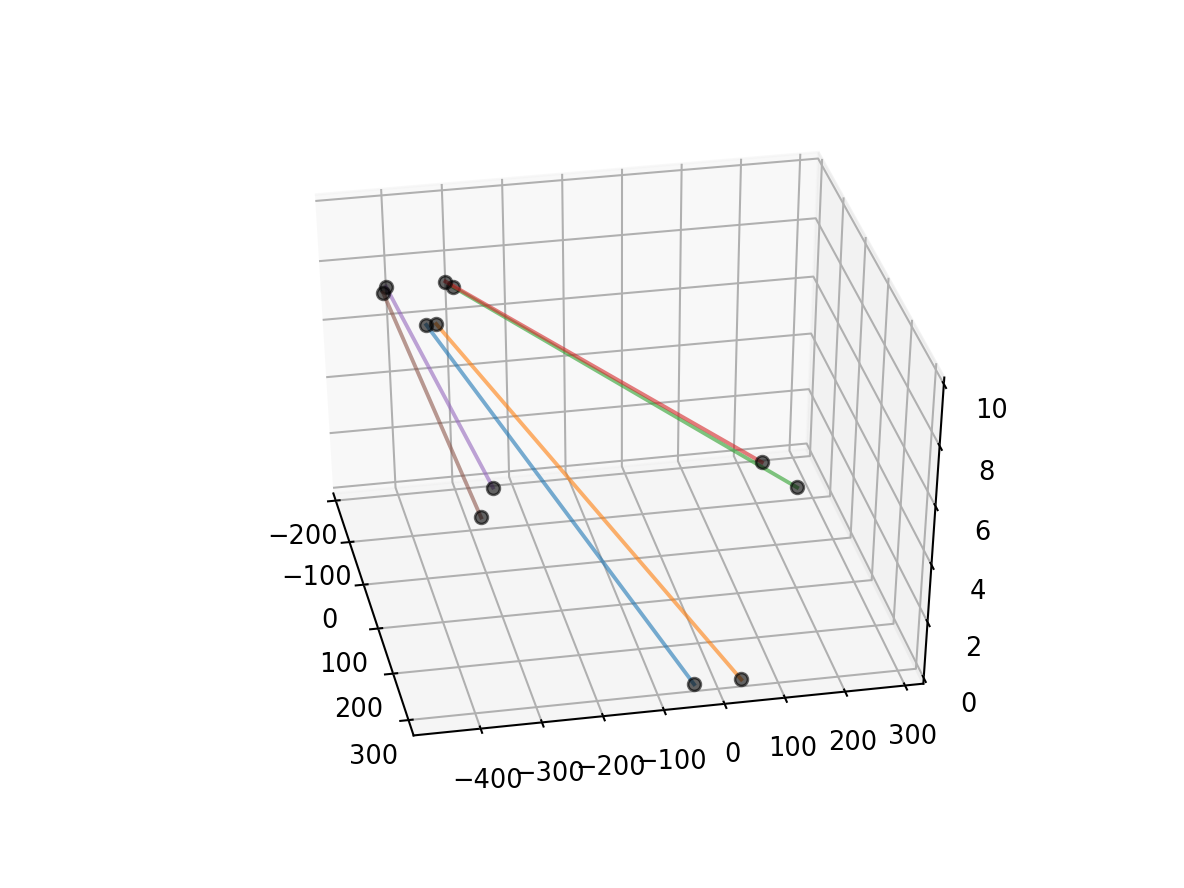

[[   1    0    0   40]
 [   0    1    0 -400]
 [   0    0    1   10]
 [   0    0    0    1]]


In [49]:
# Machine Parameters
r_base = 300 # mm
r_plat = 60 # mm
hinge_offset_angle = radians(15) # angle between hinges

# Input Position for Platform to be at
B_P_Porg = np.array([40, -400, 10, 1]) # View of 1?  
# B_P_Porg.shape = (4,1)

def det_local_hinge_coords(r, angle_offset):
    # Creating Hinge locations from offset angles and offset angle from respective hinge
    # This essentially returns local coordinate system?
    hinge_angles = [0, radians(120), radians(240)] # The platform actuators divide the circle by 3 in pairs of 2.
    hinge_coords = []
    
    for angle in hinge_angles:
        hinge_coords.append(np.array([r*cos(angle-angle_offset/2), r*sin(angle-angle_offset/2), 0, 1]))
        hinge_coords.append(np.array([r*cos(angle+angle_offset/2), r*sin(angle+angle_offset/2), 0, 1]))
    return hinge_coords

def main():
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')    
    B_base_hinge_locs = det_local_hinge_coords(r_base, hinge_offset_angle)
    P_plat_hinge_locs = det_local_hinge_coords(r_plat, hinge_offset_angle)
    # B_P_Porg is essentially the input, we know the location we want in the base coordinate system, and for simplicity,
    # I want that to be the center of the platform, with no rotation of the platform

    '''
    out = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , P_plat_hinge_locs))
    for coord in out:
        ax1.plot(xs = [coord[0]],ys = [coord[1]],zs = [coord[2]], 
                 markerfacecolor='k', markeredgecolor='k', linestyle = 'None', marker='o', markersize=5, alpha=0.6)
        
    out = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , B_base_hinge_locs))
    for coord in out:
        ax1.plot(xs = [coord[0]],ys = [coord[1]],zs = [coord[2]], 
                 markerfacecolor='k', markeredgecolor='k', linestyle = 'None', marker='o', markersize=5, alpha=0.6)
    '''
    
    R1 = np.array([1,0,0,0])
    
    R2 = np.array([0,1,0,0])
    
    R3 = np.array([0,0,1,0])
    #     R3.shape = (4,1)
    
    T = np.array([R1, R2, R3, B_P_Porg]).transpose()
    print(T)
    
#     print(P_plat_hinge_locs)
    B_plat_hinge_locs = []
    # Transform the platform hinge locations into the base frame
    for hinge in P_plat_hinge_locs:
        hinge = np.array(hinge)
        hinge.shape = (4,1)
#         print(hinge)
        B_plat_hinge_locs.append(T@hinge)
#         print(T@hinge)

    for hinge_loc in B_base_hinge_locs:
        hinge_loc.shape = (4,1)
    
    B_plat_hinge_locs = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , B_plat_hinge_locs))
    '''
    for coord in B_plat_hinge_locs:
        ax1.plot(xs = [float(coord[0])],ys = [float(coord[1])],zs = [float(coord[2])],
                 markerfacecolor='k', markeredgecolor='k', linestyle = 'None', marker='o', markersize=5, alpha=0.6)
    '''
    B_base_hinge_locs = list(map(lambda hinge_coords:np.delete(hinge_coords, 3, 0) , B_base_hinge_locs))
    
    for coord_plat, coord_base in zip(B_plat_hinge_locs, B_base_hinge_locs):
        ax1.plot(xs = [float(coord_plat[0]), float(coord_base[0])],ys = [float(coord_plat[1]),float(coord_base[1])],
                 zs = [float(coord_plat[2]),float(coord_base[2])],
                 markerfacecolor='k', markeredgecolor='k', linestyle = 'solid', marker='o', markersize=5, alpha=0.6)
    
    actuators_maybe=[]
    for base_hinge, plat_hinge in zip(B_base_hinge_locs, B_plat_hinge_locs):
        actuators_maybe.append(plat_hinge-base_hinge)    
    
    actuator_len = []
    for actuator in actuators_maybe:
        actuator_len.append(LA.norm(actuator))
#     print(actuator_len)
    
    # Defining Locations of the base hinges
    xs=[]
    ys = []
    zs =[]

#     for location in actuators_maybe:
#         xs.append(location[0])
#         ys.append(location[1])
#         zs.append(location[2])
#         ax1.plot([float(location[0])], [float(location[1])], [float(location[2])], 
#                  markerfacecolor='k', markeredgecolor='k', linestyle = 'None', marker='o', markersize=5, alpha=0.6)
    
if __name__ == "__main__":
    main()